# Running plots 

Runsingup lacks plots in there data. Median, mean are interesting but my favorite thing to see is a histogram 

The following is data pulled programatically from runsignup.com from the Madison Marathon 2022

URL to get some data https://runsignup.com/Race/Results/26569/?resultSetId=355216&page=1&num=1000&search=#resultSetId-355216;perpage:2000 

Then for example, here is my histogram plot from the data: 


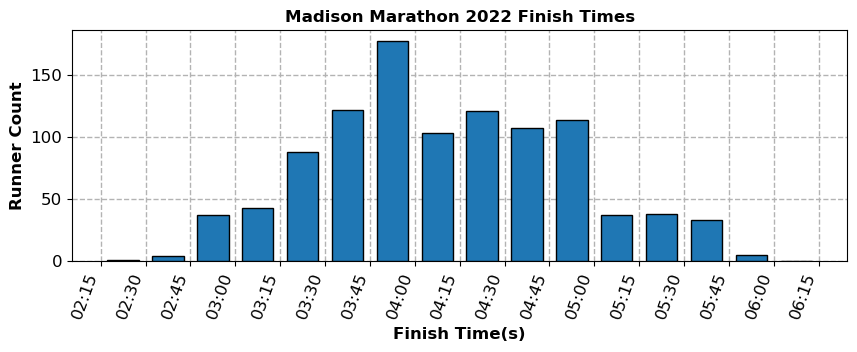

In [38]:
if 'fig_1' in globals(): display(fig_1) 

In [39]:
import requests, json, os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_formats = ['png']
import numpy as np
import matplotlib as matplotlib
import math
import pandas
from matplotlib import animation, rc
from IPython.display import HTML
from pandas import DataFrame
from numpy import genfromtxt
from IPython.display import display
from datetime import datetime, timedelta

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)


In [40]:
# API pull data from runsignup

# uncomment the following to make the request, to be site friendly, this is commented out 

# req_url = 'https://runsignup.com/Race/Results/26569/?resultSetId=355216&page=1&num=2000&search=#resultSetId-355216;perpage:2000'
# running_data = requests.get(req_url,headers = {"Accept": "application/json"} )
# running_data_json = json.loads(running_data.text)

# pull from saved
file1 = open("data/running_data.json", "r+")
running_data_json = json.loads(file1.read())

run_data = np.array(running_data_json['resultSet']['results'])

In [41]:
#create create a backup of the data for no doubt, the API will be broken tomorrow

# data_path = './data'
# if not os.path.exists(data_path): # ensure export folder exists
#     os.makedirs(data_path)
# file_path = data_path + '/running_data.json'
# with open(file_path, 'w') as f:
#     f.write(running_data.text)


In [42]:
# get headers
running_headers = []
for i in range(len(running_data_json['headings'])):
    running_headers.append(running_data_json['headings'][i]['key'])
running_headers;

In [43]:
# convert strings such as '2:24:55.27' to datetime
finish_times = []
for i in range(len(run_data)):
    try:
        finish_times.append(datetime.strptime(run_data[:,running_headers.index('chip_time')][i],"%H:%M:%S.%f"))
    except:
        0

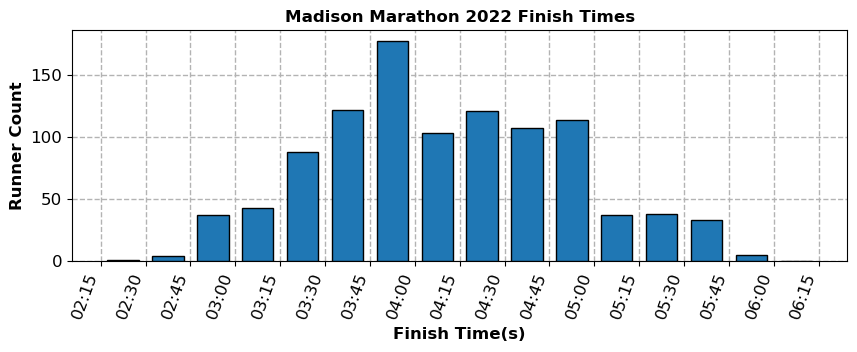

In [44]:
fig_1,ax1 = plt.subplots()

# Get nices bins 
time_start = datetime.strptime('2:15',"%H:%M")
my_bins = []
for i in range(17):
    my_bins.append(time_start + timedelta(minutes=i*15))

ax1.grid(color='0.7', linestyle='--', linewidth=1, zorder=0) # Grid
ax1.hist(finish_times, bins=my_bins, ec="black", rwidth=0.7,zorder=3) # times & bins
xfmt = matplotlib.dates.DateFormatter('%H:%M') # clean time labels 
ax1.xaxis.set_major_formatter(xfmt) # apply label format 
fig_1.set_size_inches(10,3); # figure size 
plt.xticks(rotation=70, ha='right');
plt.xticks(my_bins);
plt.ylabel('Runner Count')
plt.xlabel('Finish Time(s)');
plt.title('Madison Marathon 2022 Finish Times');

Note, quite a few more interesting plots could be made by sepperating data by the provided headers:

In [45]:
running_headers

['race_placement',
 'bib_num',
 'name',
 'gender',
 'field_274839',
 'age',
 'age_performance_percentage',
 'division_place',
 'division',
 'city',
 'state',
 'split_417802',
 'split_417802_pace',
 'split_417803',
 'split_417803_pace',
 'split_417804',
 'split_417804_pace',
 'split_417805',
 'split_417805_pace',
 'clock_time',
 'chip_time',
 'avg_pace',
 'countrycode',
 'profile_image_url']